## Module 2 Project: "Mother-Figure" portrayals in animated films 

**1. Dataset:** 
    
Portrayals of female characters in animated movies between 1930 and 2011. Two variables define the portrayal: 
- Psychological (Psy): Can be (Comforting), (Neutral), (Threatening)
- Professional (Pro): Can be (At home), (Part-time work), (Full-time work)
 
    
**2. There are two objectives:**
    
a. Find whether there is a correlation between Psycological and Professional portrayals. The hypothesis being that there is a correlation, and "At home" potrayals are often also "Comforting". This can be tested with a chi-sq test, in which the null hypothesis is that there is no correlation between the variables
    
b. Find whether this correlation changes with decade

Display the results of the chi-squared test in a way that is easy to understand. E.g. Display expected values bar plot, and display chi-sq distribution noting the result of the test

In [1]:
#!pip install statsmodels
#!pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
#Reading in data

path = '/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS_Bern/datascience/Applied-Data-Science-git/Module-2/project/disney/TM_DB_2023_pb.csv'
df = pd.read_csv(path)
df.head()

,Mother figure,Movie title,Psy (cat),Pro (cat),Year of release,"Psy (1-Re, 2-Tr, 3-Th)","Pro (1-Ho, 2-Pt, 3-Ft)","Type of scenario (1-Based on an existing story, 2-Original)"
0,M1,A Bug's Life,Comforting,Full-time,1998,1,3,2
1,M2,Aladdin,Neutral,Full-time,1992,2,3,1
2,M3,Aladdin,Neutral,At home,1992,2,1,1
3,M4,Aladdin and the King of Thieves,Comforting,At home,1996,1,1,2
4,M5,Aladdin and the King of Thieves,Neutral,At home,1996,2,1,2


In [3]:
#Adding a column by decade and moving it next to the "Year of Release" column

df['Decade'] = ((df['Year of release'] // 10) * 10).astype(str) + "s"
c_to_move = df.pop('Decade')
df.insert(df.columns.get_loc("Year of release") + 1,'Decade',c_to_move)
df.head()

,Mother figure,Movie title,Psy (cat),Pro (cat),Year of release,Decade,"Psy (1-Re, 2-Tr, 3-Th)","Pro (1-Ho, 2-Pt, 3-Ft)","Type of scenario (1-Based on an existing story, 2-Original)"
0,M1,A Bug's Life,Comforting,Full-time,1998,1990s,1,3,2
1,M2,Aladdin,Neutral,Full-time,1992,1990s,2,3,1
2,M3,Aladdin,Neutral,At home,1992,1990s,2,1,1
3,M4,Aladdin and the King of Thieves,Comforting,At home,1996,1990s,1,1,2
4,M5,Aladdin and the King of Thieves,Neutral,At home,1996,1990s,2,1,2


In [4]:
#Renaming the "story type column"
df.rename(columns={'Type of scenario (1-Based on an existing story, 2-Original)': 'Story Type'}, inplace=True)
mapping = {1: "Existing", 2: "Original"}
df['Story Type'] = df['Story Type'].replace(mapping)

#removing columns with numerical categories
columns_to_remove = ['Psy (1-Re, 2-Tr, 3-Th)','Pro (1-Ho, 2-Pt, 3-Ft)']
df.drop(columns=columns_to_remove, inplace=True)

df

,Mother figure,Movie title,Psy (cat),Pro (cat),Year of release,Decade,Story Type
0,M1,A Bug's Life,Comforting,Full-time,1998,1990s,Original
1,M2,Aladdin,Neutral,Full-time,1992,1990s,Existing
2,M3,Aladdin,Neutral,At home,1992,1990s,Existing
3,M4,Aladdin and the King of Thieves,Comforting,At home,1996,1990s,Original
4,M5,Aladdin and the King of Thieves,Neutral,At home,1996,1990s,Original
...,...,...,...,...,...,...,...
619,M620,Up,Threatening,At home,2009,2000s,Original
620,M621,Up,Threatening,At home,2009,2000s,Original
621,M622,WALL-E,Comforting,At home,2008,2000s,Original
622,M623,WALL-E,Comforting,At home,2008,2000s,Original


In [5]:
# Creating the contingency table of the variables with each other

c_table_all = pd.crosstab(df['Psy (cat)'], df['Pro (cat)'])#, margins=True, margins_name="Total")
print(c_table_all)

Pro (cat)    At home  Full-time  Part-time
Psy (cat)                                 
Comforting       330         59         84
Neutral           58         15          7
Threatening       38         22         11


In [6]:
#Chi-Squared test (this is the key part of the project)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(c_table_all)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected values: {expected}")
if p < 0.05:
    print('The null hypothesis can be rejected. There is a correlation between Psychological and Professional portrayals of mother figures in animated movies.')
else:
    print('The null hypothesis cannot be rejected. There is no correlation between Psychological and Professional portrayals of mother figures in animated movies.')

Chi-squared statistic: 20.487798111233438
P-value: 0.00039998905239838496
Degrees of Freedom: 4
Expected values: [[322.91346154  72.76923077  77.31730769]
 [ 54.61538462  12.30769231  13.07692308]
 [ 48.47115385  10.92307692  11.60576923]]
The null hypothesis can be rejected. There is a correlation between Psychological and Professional portrayals of mother figures in animated movies.


In [7]:
expected_df = pd.DataFrame(expected, index=c_table_all.index, columns=c_table_all.columns)
print(expected_df)
print(c_table_all)


Pro (cat)       At home  Full-time  Part-time
Psy (cat)                                    
Comforting   322.913462  72.769231  77.317308
Neutral       54.615385  12.307692  13.076923
Threatening   48.471154  10.923077  11.605769
Pro (cat)    At home  Full-time  Part-time
Psy (cat)                                 
Comforting       330         59         84
Neutral           58         15          7
Threatening       38         22         11


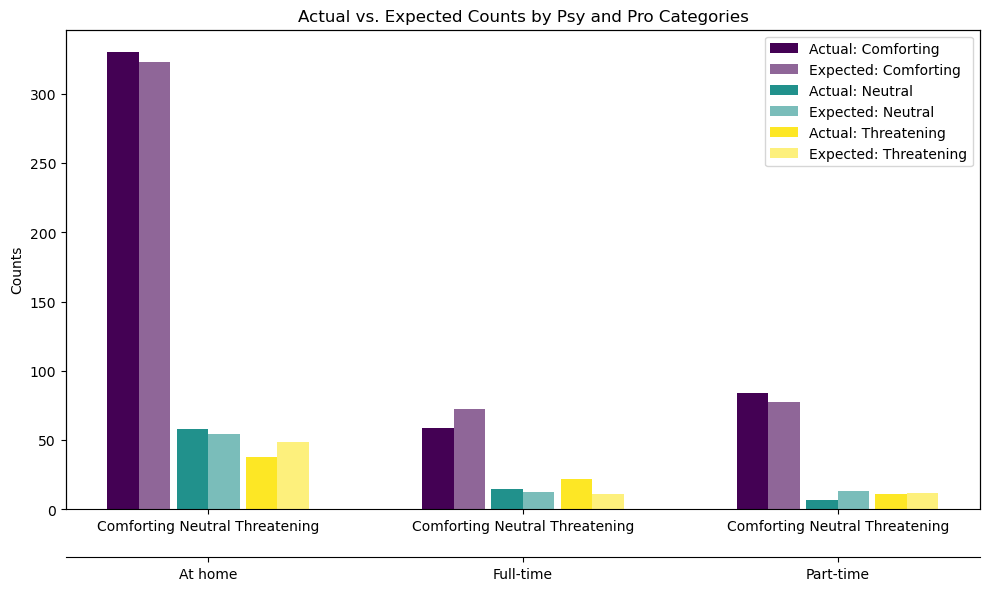

In [8]:
# Plot the actual counts vs. expected counts as a bar plot

from matplotlib.colors import ListedColormap

custom_cmap = plt.get_cmap("viridis")
num_colors = 3
colors = custom_cmap(np.linspace(0, 1, num_colors))

# Extract categories for Psy and Pro
psy_categories = c_table_all.index  # Get Psy categories from the DataFrame index
pro_categories = c_table_all.columns  # Get Pro categories from the DataFrame columns

# Prepare data for plotting
actual_counts = c_table_all.values  # Get actual counts as a NumPy array
expected_counts = expected_df.values  # Get expected counts as a NumPy array

num_psy_categories = len(psy_categories)  # Calculate the number of Psy categories
num_pro_categories = len(pro_categories)  # Calculate the number of Pro categories

width = 0.1  # Width of each group of bars
category_gap = 0.12  # Gap between Psy categories

x = np.arange(num_psy_categories)  # Create an array of x-coordinates for bars
fig, ax = plt.subplots(figsize=(10, 6))  # Create a Matplotlib figure and axes

# Loop through Psy categories
for i, psy_category in enumerate(psy_categories):
    # Adjust the x-positions for bars and x-axis ticks
    x_pos = x + i * (width + category_gap)

    # Create actual bars with labels
    actual_bars = ax.bar(
        x_pos - width/2,
        actual_counts[i],
        width,
        label=f'Actual: {psy_category}',
        color = colors[i]
    )

    # Create expected bars with labels
    expected_bars = ax.bar(
        x_pos + width/2,
        expected_counts[i],
        width,
        label=f'Expected: {psy_category}',
        alpha = 0.6,
        color = colors[i]
    )

# Set the x-axis labels for Psy categories as a single label
psy_labels = [' '.join(psy_categories)] * num_pro_categories

# Set the x-axis labels for Pro categories
pro_labels = [f'{pro}' for pro in pro_categories]

x_positions = x + (num_psy_categories - 1) * (width + category_gap) / 2  # Calculate x-positions for ticks

ax.set_xticks(x_positions)  # Set the x-axis ticks at calculated positions
ax.set_xticklabels(psy_labels)  # Set the x-axis labels as the joined Psy categories

# Create a twin x-axis (ax2) to display Pro categories
ax2 = ax.twiny()  # Create a twin x-axis that shares the same y-axis

ax2.set_xlim(ax.get_xlim())  # Ensure the same x-axis limits for ax2
ax2.set_xticks(x_positions)  # Set the x-axis ticks for ax2 at the same positions as ax

ax2.set_xticklabels(pro_labels)  # Set the x-axis labels for ax2 as Pro categories

# Position ax2 below the host axis (ax) to create the appearance of two x-axes
ax2.xaxis.set_ticks_position("bottom")  # Position ticks at the bottom of ax2
ax2.xaxis.set_label_position("bottom")  # Position the label at the bottom of ax2
ax2.spines["bottom"].set_position(("axes", -0.1))  # Offset the twin axis below the host

ax.set_ylabel('Counts')  # Set the y-axis label
ax.set_title('Actual vs. Expected Counts by Psy and Pro Categories')  # Set the plot title
ax.legend()  # Add a legend to the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_psy_categories)

# Uncomment the following lines to tighten the layout and display the plot
plt.tight_layout()
plt.show()


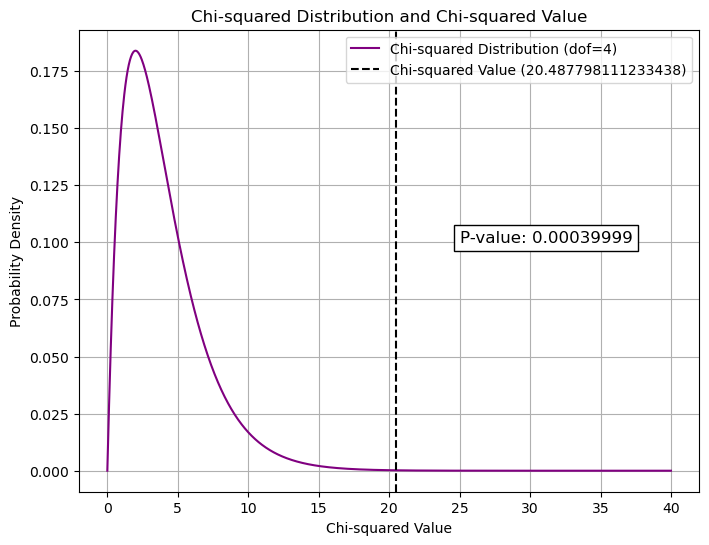

In [9]:

# Generate a range of chi-squared values for the distribution plot
x = np.linspace(0, 40, 1000)

# Calculate the probability density function (PDF) for the chi-squared distribution
pdf = stats.chi2.pdf(x, dof)

# Create the plot for the chi-squared distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Chi-squared Distribution (dof={dof})', color='purple')

# Add a vertical line to mark the chi-squared value
plt.axvline(chi2, color='black', linestyle='--', label=f'Chi-squared Value ({chi2})')

# Label the axes and add a legend
plt.xlabel('Chi-squared Value')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution and Chi-squared Value')

# Add text for the p-value as a separate legend
p_value = round(p, 8)
if p_value < 0.05:      
    plt.text(25, 0.1, f'P-value: {p_value}', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black'))
else:
    plt.text(25, 0.1, f'P-value: {p_value}', fontsize=12, color='red', bbox=dict(facecolor='white', edgecolor='black'))

plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Decade: 1930s
Chi-squared statistic: 0.4444444444444444
P-value: 0.5049850750938457
Number of movies: 4
In the 1930s, there was seemingly no correlation between Psychological and Professional portrayals of mother figures in animated movies.

Decade: 1940s
Chi-squared statistic: 4.343757746013385
P-value: 0.36147776160330275
Number of movies: 34
In the 1940s, there was seemingly no correlation between Psychological and Professional portrayals of mother figures in animated movies.

Decade: 1950s
Chi-squared statistic: 10.767149758454105
P-value: 0.004591378931471649
Number of movies: 28
In the 1950s, there was seemingly a correlation between Psychological and Professional portrayals of mother figures in animated movies.

Decade: 1960s
Chi-squared statistic: 0.6857142857142857
P-value: 0.7097395956891255
Number of movies: 8
In the 1960s, there was seemingly no correlation between Psychological and Professional portrayals of mother figures in animated movies.

Decade: 1970s
Chi-squared sta

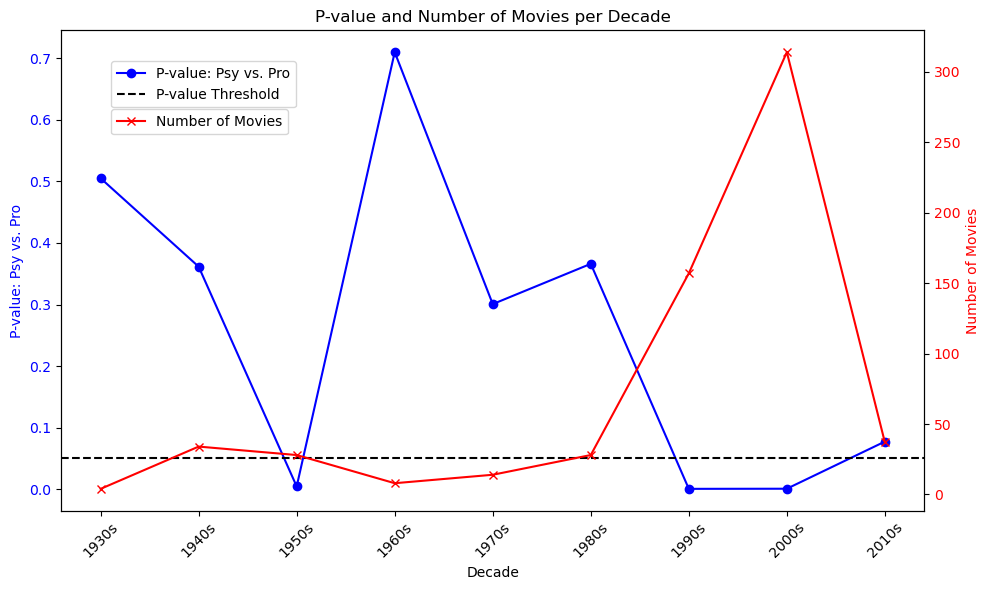

In [10]:
# Finding correlation by decade

df = df.sort_values(by='Decade')

# Extract the unique values of the 'Decade' column df and store them in the 'decades' variable
decades = df['Decade'].unique()

# Lists to store p-values and number of rows per decade
p_values = []
num_rows_per_decade = []

for decade in decades:
    subset = df[df['Decade'] == decade]

    # Get the number of rows (instances) for the current decade
    num_rows = len(subset)
    num_rows_per_decade.append(num_rows)

    c_table_dec = pd.crosstab(subset['Psy (cat)'], subset['Pro (cat)'])
    chi2_d, p_d, dof_d, expected_d = chi2_contingency(c_table_dec)
    p_values.append(p_d)

    print(f"Decade: {decade}")
    print(f"Chi-squared statistic: {chi2_d}")
    print(f"P-value: {p_d}")
    print(f"Number of movies: {num_rows}")
    if p_d < 0.05:
        print(f'In the {decade}, there was seemingly a correlation between Psychological and Professional portrayals of mother figures in animated movies.')
    else:
        print(f'In the {decade}, there was seemingly no correlation between Psychological and Professional portrayals of mother figures in animated movies.')
    print()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot p-values in blue
ax1.plot(decades, p_values, 'b', marker='o', label='P-value: Psy vs. Pro')
ax1.set_xlabel('Decade')
ax1.set_ylabel('P-value: Psy vs. Pro', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(decades)
ax1.set_xticklabels(decades, rotation=45)

# Plot number of rows in red
ax2.plot(decades, num_rows_per_decade, 'r', marker='x', label='Number of Movies')
ax2.set_ylabel('Number of Movies', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add horizontal line at p-value = 0.05 to have a visual reference of the significance level
ax1.axhline(y=0.05, color='black', linestyle='--', label='P-value Threshold')

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.85))

plt.title('P-value and Number of Movies per Decade')
plt.tight_layout()
plt.show()


In [11]:
df

,Mother figure,Movie title,Psy (cat),Pro (cat),Year of release,Decade,Story Type
367,M368,Snow White and the Seven Dwarfs,Threatening,Full-time,1937,1930s,Existing
366,M367,Snow White and the Seven Dwarfs,Comforting,At home,1937,1930s,Existing
365,M366,Snow White and the Seven Dwarfs,Comforting,At home,1937,1930s,Existing
364,M365,Snow White and the Seven Dwarfs,Comforting,At home,1937,1930s,Existing
311,M312,Pinocchio,Comforting,At home,1940,1940s,Existing
...,...,...,...,...,...,...,...
244,M245,Kung Fu Panda 2,Comforting,At home,2011,2010s,Original
600,M601,Toy Story 3,Comforting,Part-time,2010,2010s,Original
601,M602,Toy Story 3,Comforting,At home,2010,2010s,Original
603,M604,Toy Story 3,Neutral,Full-time,2010,2010s,Original


In [12]:
# Split the dataset into "Original" and "Existing" subsets
original_subset = df[df['Story Type'] == 'Original']
existing_subset = df[df['Story Type'] == 'Existing']

In [13]:
# Define a function to perform chi-squared test and return results
def perform_chi_squared_test(subset, subset_name):
    contingency_table = pd.crosstab(subset['Psy (cat)'], subset['Pro (cat)'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Create a DataFrame for the contingency table
    contingency_df = pd.DataFrame(contingency_table)

    return contingency_df, chi2, p, expected

# Perform chi-squared tests for "Original" and "Existing" subsets
c_table_original, chisq_original, p_original, exp_original = perform_chi_squared_test(original_subset, "Original")
c_table_existing, chisq_existing, p_existing, exp_existing = perform_chi_squared_test(existing_subset, "Existing")

# Print results
print("Contingency table for Original stories:")
print(c_table_original)
print(f"Chi-squared statistic for Original stories: {chisq_original}")
print(f"P-value for Original stories: {p_original}")
print()

print("Contingency table for Existing stories:")
print(c_table_existing)
print(f"Chi-squared statistic for Existing stories: {chisq_existing}")
print(f"P-value for Existing stories: {p_existing}")

Contingency table for Original stories:
Pro (cat)    At home  Full-time  Part-time
Psy (cat)                                 
Comforting       188         31         48
Neutral           32          5          4
Threatening       20         13          1
Chi-squared statistic for Original stories: 21.449301881696233
P-value for Original stories: 0.0002578951638051745

Contingency table for Existing stories:
Pro (cat)    At home  Full-time  Part-time
Psy (cat)                                 
Comforting       142         28         36
Neutral           26         10          3
Threatening       18          9         10
Chi-squared statistic for Existing stories: 10.403939653816616
P-value for Existing stories: 0.03414623761713468


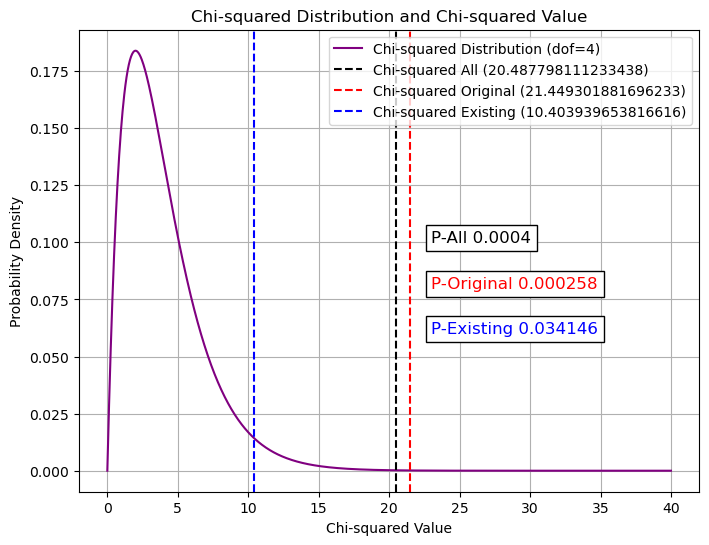

In [14]:

# Generate a range of chi-squared values for the distribution plot
x = np.linspace(0, 40, 1000)

# Calculate the probability density function (PDF) for the chi-squared distribution
pdf = stats.chi2.pdf(x, dof)

# Create the plot for the chi-squared distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Chi-squared Distribution (dof={dof})', color='purple')

# Add a vertical line to mark the chi-squared value
plt.axvline(chi2, color='black', linestyle='--', label=f'Chi-squared All ({chi2})')
plt.axvline(chisq_original, color='red', linestyle='--', label=f'Chi-squared Original ({chisq_original})')
plt.axvline(chisq_existing, color='blue', linestyle='--', label=f'Chi-squared Existing ({chisq_existing})')

# Label the axes and add a legend
plt.xlabel('Chi-squared Value')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution and Chi-squared Value')

y_position = 0.1  # Initial y-position
P_text = ['P-All', 'P-Original', "P-Existing"]
color = ['black','red','blue']
for i, p_value in enumerate([p, p_original, p_existing]):
    p_value = round(p_value, 6)
    if p_value < 0.05:      
        plt.text(23, y_position, f'{P_text[i]} {p_value}', fontsize=12, color=color[i], bbox=dict(facecolor='white', edgecolor='black'))
    else:
        plt.text(23, y_position, f'{P_text[i]} {p_value}', fontsize=12, color=color[i], bbox=dict(facecolor='white', edgecolor='black'))
    y_position -= 0.02  # Adjust the y-position for the next iteration


plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [15]:
expected_original = pd.DataFrame(exp_original, index=c_table_original.index, columns=c_table_original.columns)
expected_existing = pd.DataFrame(exp_existing, index=c_table_existing.index, columns=c_table_existing.columns)

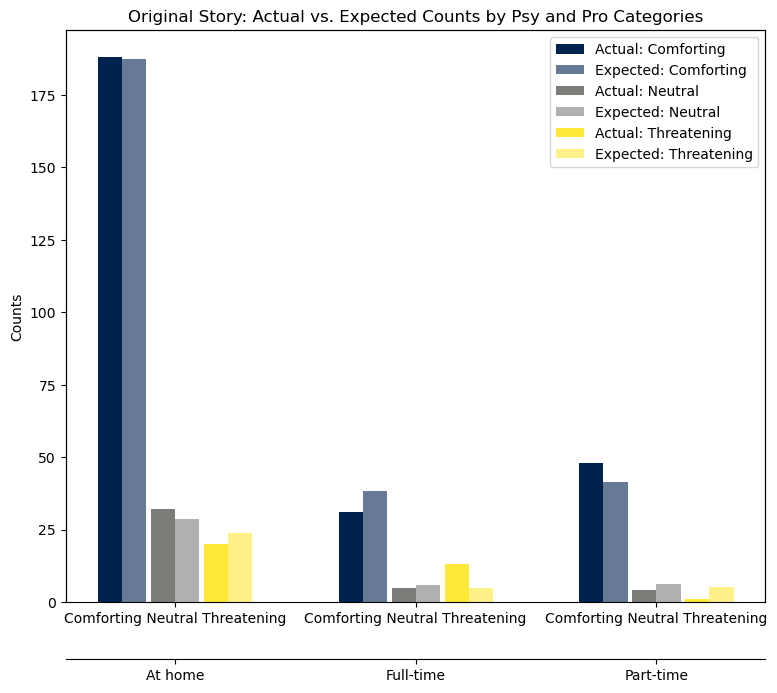

In [16]:
# FOR ORIGINAL STORIES: Plot the actual counts vs. expected counts as a bar plot

from matplotlib.colors import ListedColormap

custom_cmap = plt.get_cmap("cividis")
num_colors = 3
colors = custom_cmap(np.linspace(0, 1, num_colors))

# Extract categories for Psy and Pro
psy_categories = c_table_original.index  # Get Psy categories from the DataFrame index
pro_categories = c_table_original.columns  # Get Pro categories from the DataFrame columns

# Prepare data for plotting
actual_counts = c_table_original.values  # Get actual counts as a NumPy array
expected_counts = expected_original.values  # Get expected counts as a NumPy array

num_psy_categories = len(psy_categories)  # Calculate the number of Psy categories
num_pro_categories = len(pro_categories)  # Calculate the number of Pro categories

width = 0.1  # Width of each group of bars
category_gap = 0.12  # Gap between Psy categories

x = np.arange(num_psy_categories)  # Create an array of x-coordinates for bars
fig, ax = plt.subplots(figsize=(8, 7))  # Create a Matplotlib figure and axes

# Loop through Psy categories
for i, psy_category in enumerate(psy_categories):
    # Adjust the x-positions for bars and x-axis ticks
    x_pos = x + i * (width + category_gap)

    # Create actual bars with labels
    actual_bars = ax.bar(
        x_pos - width/2,
        actual_counts[i],
        width,
        label=f'Actual: {psy_category}',
        color = colors[i]
    )

    # Create expected bars with labels
    expected_bars = ax.bar(
        x_pos + width/2,
        expected_counts[i],
        width,
        label=f'Expected: {psy_category}',
        alpha = 0.6,
        color = colors[i]
    )

# Set the x-axis labels for Psy categories as a single label
psy_labels = [' '.join(psy_categories)] * num_pro_categories

# Set the x-axis labels for Pro categories
pro_labels = [f'{pro}' for pro in pro_categories]

x_positions = x + (num_psy_categories - 1) * (width + category_gap) / 2  # Calculate x-positions for ticks

ax.set_xticks(x_positions)  # Set the x-axis ticks at calculated positions
ax.set_xticklabels(psy_labels)  # Set the x-axis labels as the joined Psy categories

# Create a twin x-axis (ax2) to display Pro categories
ax2 = ax.twiny()  # Create a twin x-axis that shares the same y-axis

ax2.set_xlim(ax.get_xlim())  # Ensure the same x-axis limits for ax2
ax2.set_xticks(x_positions)  # Set the x-axis ticks for ax2 at the same positions as ax

ax2.set_xticklabels(pro_labels)  # Set the x-axis labels for ax2 as Pro categories

# Position ax2 below the host axis (ax) to create the appearance of two x-axes
ax2.xaxis.set_ticks_position("bottom")  # Position ticks at the bottom of ax2
ax2.xaxis.set_label_position("bottom")  # Position the label at the bottom of ax2
ax2.spines["bottom"].set_position(("axes", -0.1))  # Offset the twin axis below the host

ax.set_ylabel('Counts')  # Set the y-axis label
ax.set_title('Original Story: Actual vs. Expected Counts by Psy and Pro Categories')  # Set the plot title
ax.legend()  # Add a legend to the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_psy_categories)

# Uncomment the following lines to tighten the layout and display the plot
plt.tight_layout()
plt.show()

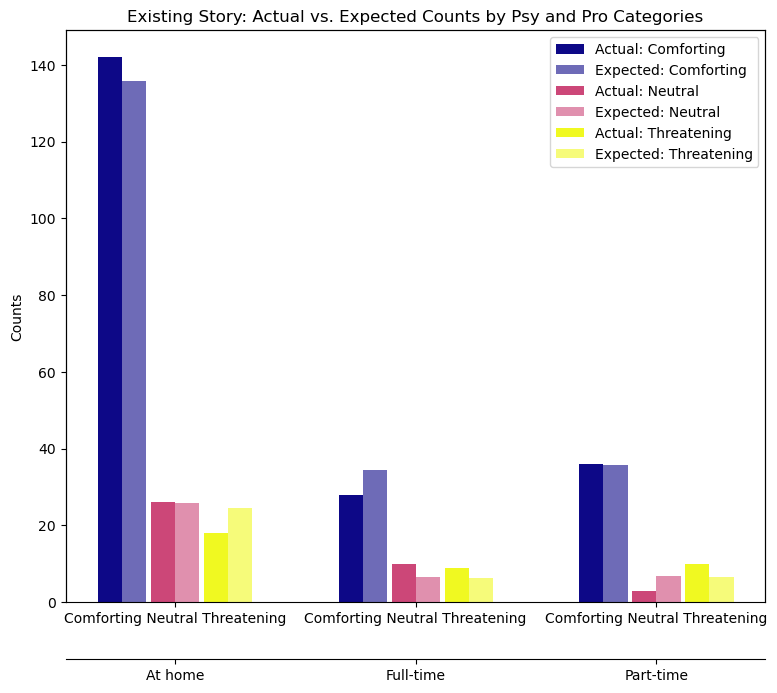

In [17]:
# FOR Existing STORIES: Plot the actual counts vs. expected counts as a bar plot

from matplotlib.colors import ListedColormap

custom_cmap = plt.get_cmap("plasma")
num_colors = 3
colors = custom_cmap(np.linspace(0, 1, num_colors))

# Extract categories for Psy and Pro
psy_categories = c_table_existing.index  # Get Psy categories from the DataFrame index
pro_categories = c_table_existing.columns  # Get Pro categories from the DataFrame columns

# Prepare data for plotting
actual_counts = c_table_existing.values  # Get actual counts as a NumPy array
expected_counts = expected_existing.values  # Get expected counts as a NumPy array

num_psy_categories = len(psy_categories)  # Calculate the number of Psy categories
num_pro_categories = len(pro_categories)  # Calculate the number of Pro categories

width = 0.1  # Width of each group of bars
category_gap = 0.12  # Gap between Psy categories

x = np.arange(num_psy_categories)  # Create an array of x-coordinates for bars
fig, ax = plt.subplots(figsize=(8, 7))  # Create a Matplotlib figure and axes

# Loop through Psy categories
for i, psy_category in enumerate(psy_categories):
    # Adjust the x-positions for bars and x-axis ticks
    x_pos = x + i * (width + category_gap)

    # Create actual bars with labels
    actual_bars = ax.bar(
        x_pos - width/2,
        actual_counts[i],
        width,
        label=f'Actual: {psy_category}',
        color = colors[i]
    )

    # Create expected bars with labels
    expected_bars = ax.bar(
        x_pos + width/2,
        expected_counts[i],
        width,
        label=f'Expected: {psy_category}',
        alpha = 0.6,
        color = colors[i]
    )

# Set the x-axis labels for Psy categories as a single label
psy_labels = [' '.join(psy_categories)] * num_pro_categories

# Set the x-axis labels for Pro categories
pro_labels = [f'{pro}' for pro in pro_categories]

x_positions = x + (num_psy_categories - 1) * (width + category_gap) / 2  # Calculate x-positions for ticks

ax.set_xticks(x_positions)  # Set the x-axis ticks at calculated positions
ax.set_xticklabels(psy_labels)  # Set the x-axis labels as the joined Psy categories

# Create a twin x-axis (ax2) to display Pro categories
ax2 = ax.twiny()  # Create a twin x-axis that shares the same y-axis

ax2.set_xlim(ax.get_xlim())  # Ensure the same x-axis limits for ax2
ax2.set_xticks(x_positions)  # Set the x-axis ticks for ax2 at the same positions as ax

ax2.set_xticklabels(pro_labels)  # Set the x-axis labels for ax2 as Pro categories

# Position ax2 below the host axis (ax) to create the appearance of two x-axes
ax2.xaxis.set_ticks_position("bottom")  # Position ticks at the bottom of ax2
ax2.xaxis.set_label_position("bottom")  # Position the label at the bottom of ax2
ax2.spines["bottom"].set_position(("axes", -0.1))  # Offset the twin axis below the host

ax.set_ylabel('Counts')  # Set the y-axis label
ax.set_title('Existing Story: Actual vs. Expected Counts by Psy and Pro Categories')  # Set the plot title
ax.legend()  # Add a legend to the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_psy_categories)

# Uncomment the following lines to tighten the layout and display the plot
plt.tight_layout()
plt.show()

In [18]:
# Sample data
data1 = [5,3,2,56,12,19,9,4,8] #pre 1990s
data2 = [22,7,1,92,18,17,10,5,2] #post 1990s

# Perform the Mann-Whitney U test
statistic, p_value_mw = stats.mannwhitneyu(data1, data2, alternative='two-sided')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("Two-tailed p-value:", p_value_mw)

# Check the significance level (e.g. 0.05)
alpha = 0.05
if p_value_mw < alpha:
    print("Reject the null hypothesis: There is a significant difference between pre and post 1990s datasets")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between pre and post 1990s datasets") 

Mann-Whitney U Statistic: 36.0
Two-tailed p-value: 0.7236583854856268
Fail to reject the null hypothesis: There is no significant difference between pre and post 1990s datasets
